# **Import library**

In [ ]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed

np.random.seed(74)

# **Read and explore the dataset**

In [ ]:
file = '/content/CardiacPrediction.xlsx'
ipData = pd.read_excel(file, sheet_name='CoroHeartDis')
print(ipData.shape)

(37079, 51)


In [ ]:
ipData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   Annual-Family-Income         37079 non-null  int64  
 4   Ratio-Family-Income-Poverty  37079 non-null  float64
 5   X60-sec-pulse                37079 non-null  int64  
 6   Systolic                     37079 non-null  int64  
 7   Diastolic                    37079 non-null  int64  
 8   Weight                       37079 non-null  float64
 9   Height                       37079 non-null  float64
 10  Body-Mass-Index              37079 non-null  float64
 11  White-Blood-Cells            37079 non-null  float64
 12  Lymphocyte                   37079 non-null  float64
 13  Monocyte        

In [ ]:
ipData.describe().T

,count,mean,std,min,25%,50%,75%,max
SEQN,37079.0,48901.041236,26753.636441,2.000,26120.500,50065.000000,71173.500,93702.000
Gender,37079.0,1.513282,0.499830,1.000,1.000,2.000000,2.000,2.000
Age,37079.0,48.943661,18.010440,20.000,33.000,48.000000,63.000,85.000
Annual-Family-Income,37079.0,7.358208,3.994083,1.000,4.000,7.000000,10.000,15.000
Ratio-Family-Income-Poverty,37079.0,2.559026,1.624789,0.000,1.140,2.180000,4.130,5.000
X60-sec-pulse,37079.0,72.579250,12.242108,32.000,64.000,72.000000,80.000,224.000
Systolic,37079.0,124.090078,19.254741,0.000,111.000,121.000000,134.000,270.000
Diastolic,37079.0,69.919253,13.575804,0.000,62.000,70.000000,78.000,132.000
Weight,37079.0,80.988276,20.678734,32.300,66.500,78.200000,92.100,371.000
Height,37079.0,167.389601,10.122908,129.700,160.000,167.100000,174.600,204.500


In [ ]:
ipData.head()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0


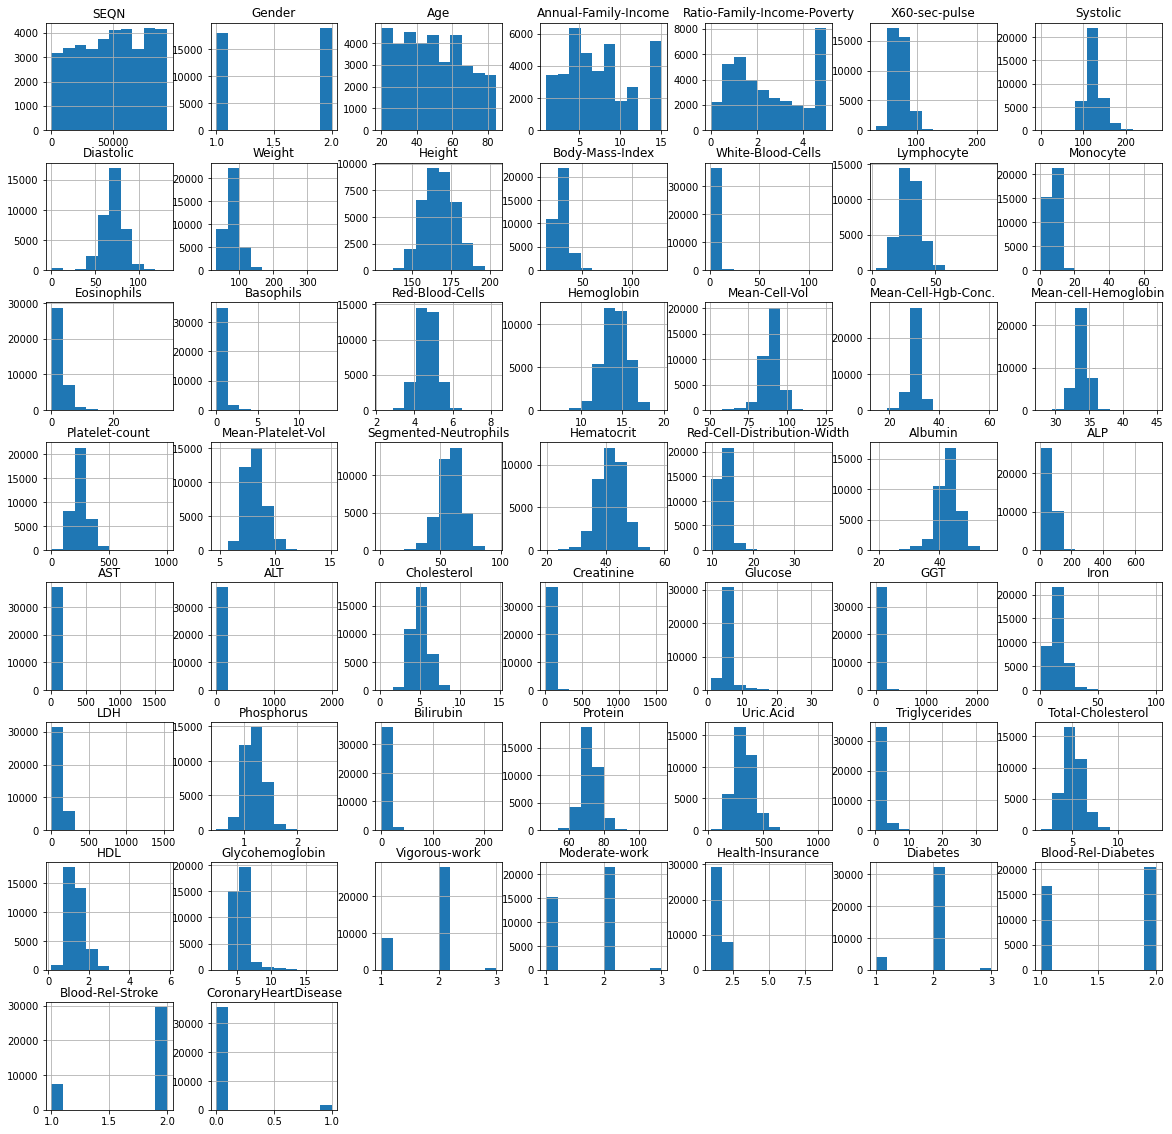

In [ ]:
#histogram
import matplotlib.pyplot as plt
ipData.hist(figsize = (20, 20))
plt.show()


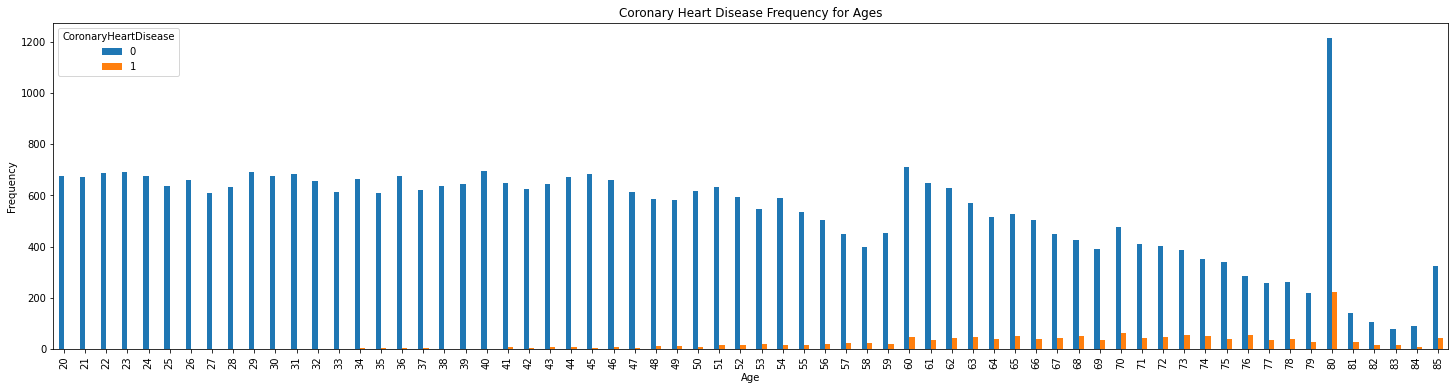

In [ ]:
pd.crosstab(ipData.Age,ipData.CoronaryHeartDisease).plot(kind="bar",figsize=(25,6))
plt.title('Coronary Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

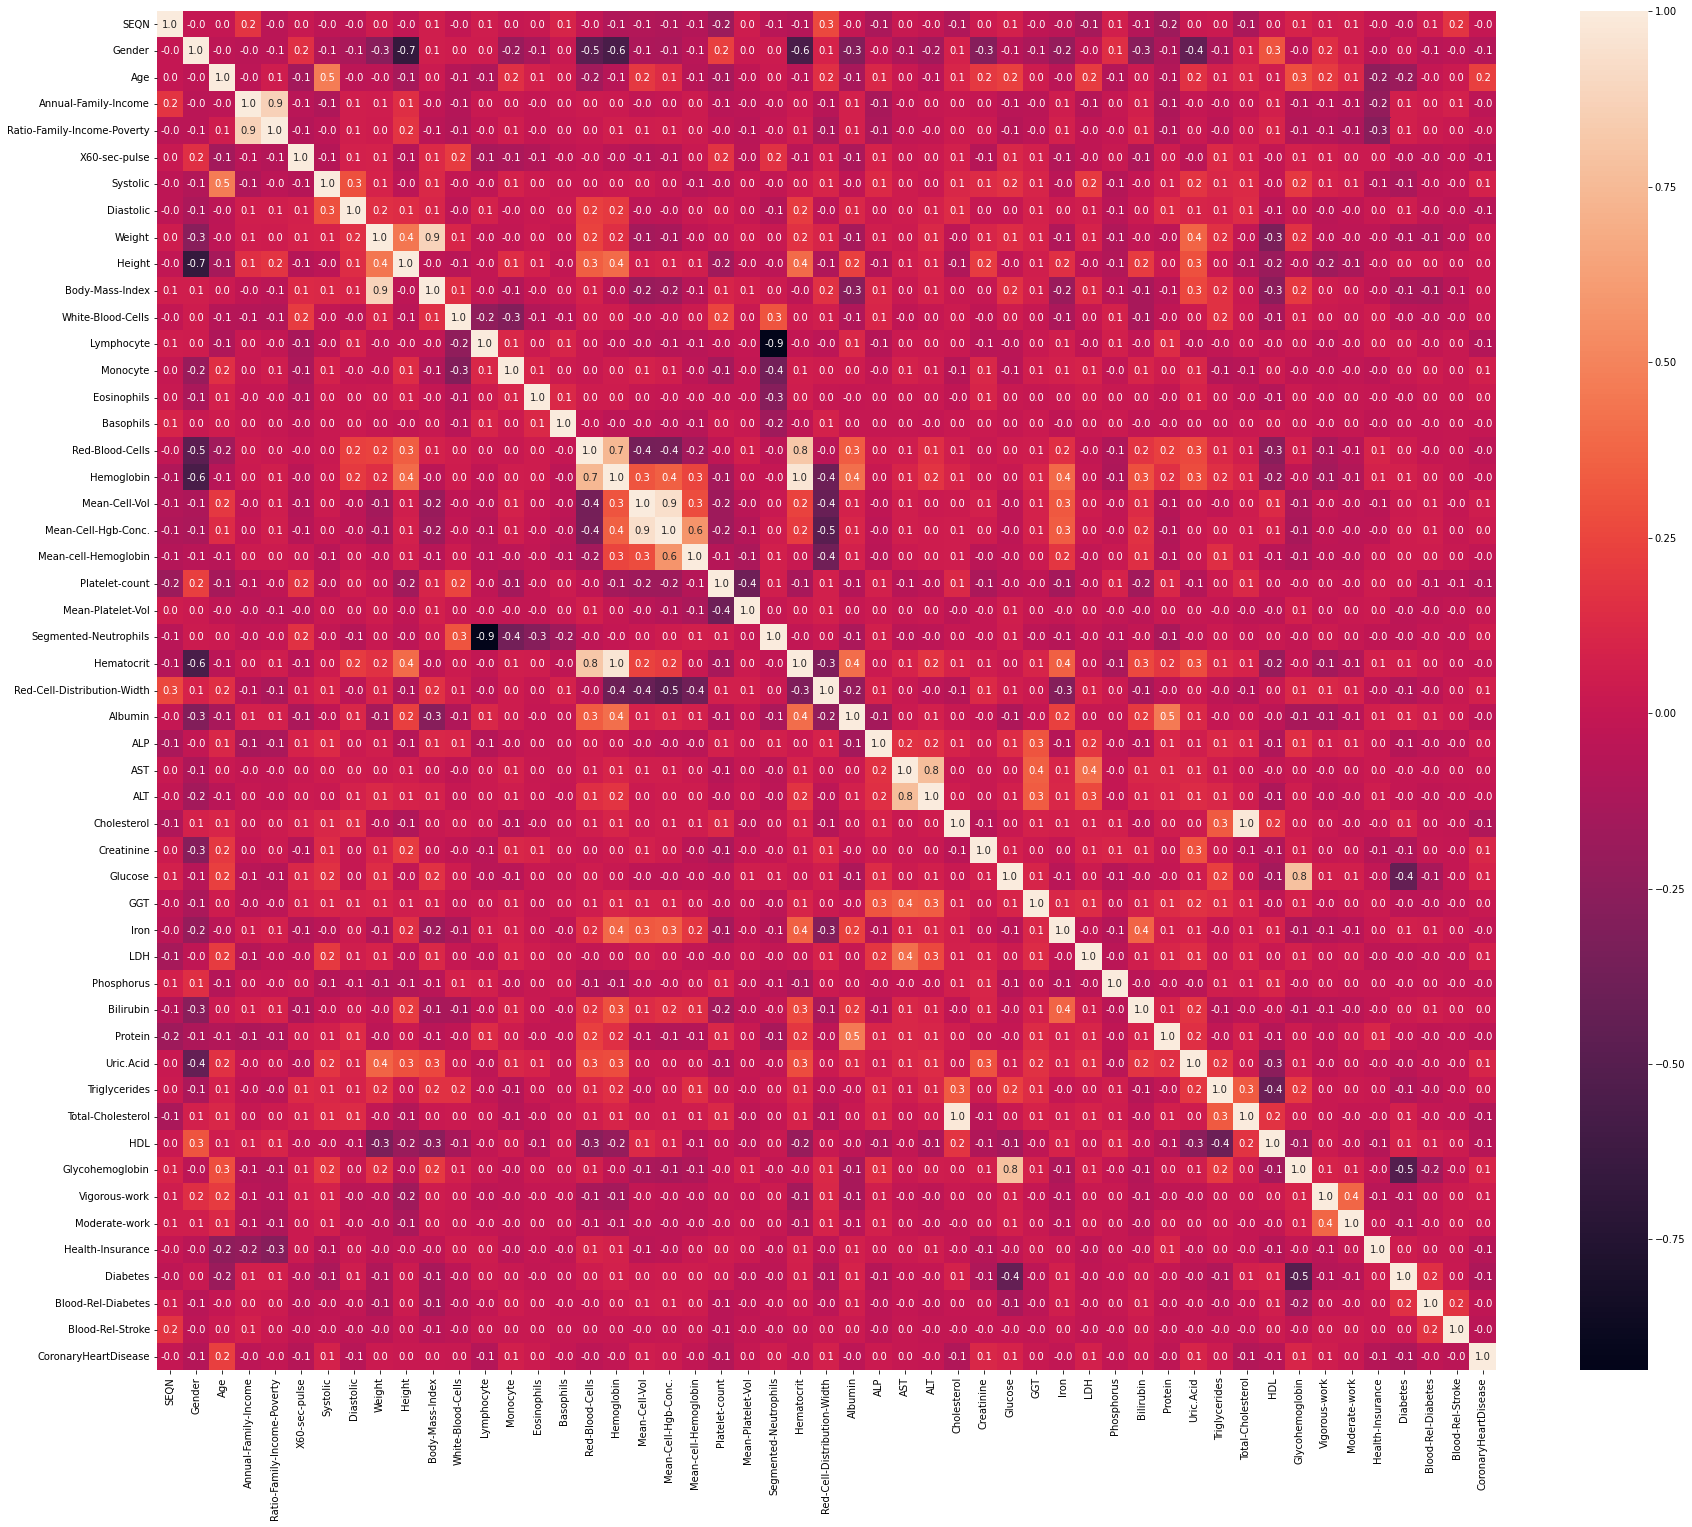

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,25))
sns.heatmap(ipData.corr(),annot=True,fmt='.1f')
plt.show()

# **Dataset preprocess**

In [ ]:
# data drop
opLabel = np.array(ipData['CoronaryHeartDisease'])
ipData.drop(['SEQN','CoronaryHeartDisease','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.',
          'Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)


In [ ]:
# dummy variable for categorical variables
ipData = pd.get_dummies(ipData,columns=["Gender","Diabetes","Blood-Rel-Diabetes","Blood-Rel-Stroke","Vigorous-work","Moderate-work"]) 

varb = np.array(ipData.columns)
ipData = np.array(ipData)

In [ ]:
print(ipData.shape)
print(varb)
print(len(opLabel[opLabel==0]))
print(len(opLabel[opLabel==1]))

(37079, 45)
['Age' 'Systolic' 'Diastolic' 'Weight' 'Body-Mass-Index'
 'White-Blood-Cells' 'Basophils' 'Red-Blood-Cells' 'Hemoglobin'
 'Mean-cell-Hemoglobin' 'Platelet-count' 'Mean-Platelet-Vol'
 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST' 'ALT' 'Cholesterol'
 'Creatinine' 'Glucose' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3' 'Blood-Rel-Diabetes_1'
 'Blood-Rel-Diabetes_2' 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2'
 'Vigorous-work_1' 'Vigorous-work_2' 'Vigorous-work_3' 'Moderate-work_1'
 'Moderate-work_2' 'Moderate-work_3']
35571
1508


# **Feature Nomination using LASSO**

In [ ]:
#Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression


featureVote = np.zeros(ipData.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(opLabel==0)[0]   #no coronary heart disease
    label1_indx = np.where(opLabel==1)[0]   #coronary heart disease 
    numTrainData0 = 1300
    numTrainData1 = 1300
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)
    
    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]
    
    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)    
    trainData  =  ipData[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  ipData[testIndx]
    testLabel  =  opLabel[testIndx]    
    
    ##%% data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)
    
    ##%% Elastic net and Lasso from scikit
    #regr = ElasticNet(random_state=0, alpha=1, l1_ratio=0.03, tol=0.000001, max_iter=100000)
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    #regr = LogisticRegression(penalty='l1',random_state=0,C=100,tol=0.000001,max_iter=100,class_weight='balanced')
    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)    
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1

(45,)


In [ ]:
print(featureVote)
print(iter)

[100.  35.  81.  32.  14.  87.  42.  64.  12.  17.  99.  53.  98.  40.
  37.  31.   9. 100.  86.  16.  39.  45. 100.  29.  31.  30. 100. 100.
  98.  90. 100.  53.  85.  84.   7.  80.  32. 100.  53.  14.  20.  76.
   5.  95.  61.]
<built-in function iter>




1. Feature nomination via Lasso (from feature 1 to 30)
2. We keep the dummy variables
3. thresH = iteR//5. Pick features occuring more than 5 times




In [ ]:
thresH = 0
featureIndx = np.where(featureVote[0:30]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(30,ipData.shape[1]))
print(varb[featureIndx])

['Age' 'Systolic' 'Diastolic' 'Weight' 'Body-Mass-Index'
 'White-Blood-Cells' 'Basophils' 'Red-Blood-Cells' 'Hemoglobin'
 'Mean-cell-Hemoglobin' 'Platelet-count' 'Mean-Platelet-Vol'
 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST' 'ALT' 'Cholesterol'
 'Creatinine' 'Glucose' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3' 'Blood-Rel-Diabetes_1'
 'Blood-Rel-Diabetes_2' 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2'
 'Vigorous-work_1' 'Vigorous-work_2' 'Vigorous-work_3' 'Moderate-work_1'
 'Moderate-work_2' 'Moderate-work_3']


In [ ]:
tInx = np.arange(ipData.shape[1])
rrInx = tInx[~np.isin(tInx,featureIndx)]
print(varb[rrInx])

[]


# **Feature selection/Dataset reduction**

In [ ]:
reduced_data = ipData[:,featureIndx]

label0_indx = np.where(opLabel==0)[0]   #no cardiac arrest
label1_indx = np.where(opLabel==1)[0]   #cardiac arrest 
numTrainData0 = 4300
numTrainData1 = 1169
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

testIndx  = np.append(label0_indx_test,label1_indx_test)
trainIndx = np.append(label0_indx_train,label1_indx_train)    
x_train  =  reduced_data[trainIndx]
y_train  =  opLabel[trainIndx]
x_test   =  reduced_data[testIndx]
y_test   =  opLabel[testIndx] 

In [ ]:
print(len(label0_indx_test))

31271


In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

x_train_org = copy.deepcopy(x_train)
x_test_org  = copy.deepcopy(x_test)
y_train_org     = copy.deepcopy(y_train)
y_test_org      = copy.deepcopy(y_test)

# **Dataset visualization**

In [ ]:
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5469 samples in 0.001s...
[t-SNE] Computed neighbors for 5469 samples in 0.852s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5469
[t-SNE] Computed conditional probabilities for sample 2000 / 5469
[t-SNE] Computed conditional probabilities for sample 3000 / 5469
[t-SNE] Computed conditional probabilities for sample 4000 / 5469
[t-SNE] Computed conditional probabilities for sample 5000 / 5469
[t-SNE] Computed conditional probabilities for sample 5469 / 5469
[t-SNE] Mean sigma: 1.796407
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.256119
[t-SNE] KL divergence after 300 iterations: 2.195745


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


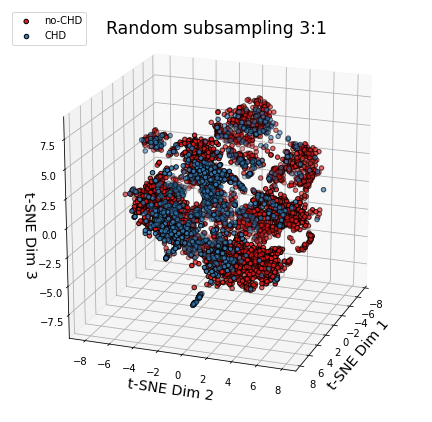

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random subsampling 3:1",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('tSNE_RUS.png', dpi=100)

# **Preparing data**

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#%% one-hot-encoding
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

# **Model**


---

MLP+ CONV: Input => Dense(64) => Conv(2) => Conv(4) = Dense(512) => Dense (2)

In [ ]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN1D4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 45, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 45)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2944      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
class_weight = {0: 1, 1: 2.9}

history = myCNN1D4.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
171/171 [==============================] - 2s 12ms/step - loss: 0.4781 - accuracy: 0.8259
Epoch 2/60
171/171 [==============================] - 2s 11ms/step - loss: 0.4669 - accuracy: 0.8303
Epoch 3/60
171/171 [==============================] - 2s 12ms/step - loss: 0.4705 - accuracy: 0.8265
Epoch 4/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4771 - accuracy: 0.8267
Epoch 5/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4630 - accuracy: 0.8310
Epoch 6/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4757 - accuracy: 0.8289
Epoch 7/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4648 - accuracy: 0.8278
Epoch 8/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4737 - accuracy: 0.8345
Epoch 9/60
171/171 [==============================] - 2s 10ms/step - loss: 0.4600 - accuracy: 0.8362
Epoch 10/60
171/171 [==============================] - 1s 8ms/step - loss: 0.4662 - accurac

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


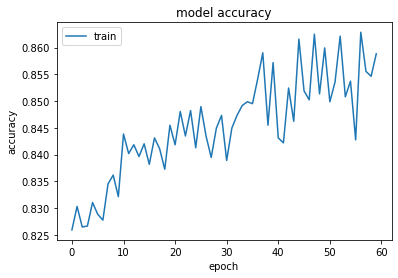

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

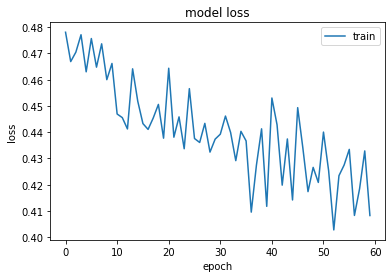

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Result**

**Test accuracy**

In [ ]:
train_loss, train_acc = myCNN1D4.evaluate(x_train,y_train) 
test_loss,test_acc = myCNN1D4.evaluate(x_test,y_test)
print(test_acc)

988/988 [==============================] - 5s 5ms/step - loss: 0.3916 - accuracy: 0.7765
0.7764631509780884


**Recall**

In [ ]:
from sklearn.metrics import recall_score
predlabel = myCNN1D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
recall = recall_score(np.argmax(y_test,axis=1), f, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.746


**AUC**

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, myCNN1D4.predict(x_test))
print(auc)

0.8562962621271898


**Specificity**

In [ ]:
from sklearn.metrics import confusion_matrix
f = np.argmax(predlabel,axis=1)
tn, fp, fn, tp = confusion_matrix(np.argmax(y_test,axis=1),f).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.8047711937577947


**Confusion Matrix**


In [ ]:
from sklearn.metrics import classification_report

print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(np.argmax(y_test,axis=1),f)
print('Classification report : \n',matrix)

Outcome values : 
 253 86 6105 25166
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     31271
           1       0.04      0.75      0.08       339

    accuracy                           0.80     31610
   macro avg       0.52      0.78      0.48     31610
weighted avg       0.99      0.80      0.88     31610

